In [5]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [7]:
df.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [8]:
df.month.value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [9]:
df.day.value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [10]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Checking for null values & data types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

# Scaling the data 

In [12]:
#taking only the numerical data for input
df1= df.iloc[:,2:30]

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(df1)
df_norm = sc.transform(df1)
df_norm  

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [14]:
df_norm.shape

(517, 28)

# Using PCA to reduce number of columns

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 28)
pca_values = pca.fit_transform(df_norm)
pca_values

array([[ 3.76670947e+00, -1.32025451e+00, -8.43971398e-01, ...,
        -6.53345819e-02,  4.98037274e-16, -2.73530281e-16],
       [ 3.90786263e-01,  8.31061522e-01, -1.10136513e+00, ...,
         3.42618601e-02, -9.55928328e-15,  1.15055466e-15],
       [ 6.90415596e-01,  1.17774562e+00, -1.22199841e+00, ...,
         2.63235187e-02,  2.58690766e-15, -5.66797432e-17],
       ...,
       [ 9.21634000e-01, -2.64543072e-01,  2.71921606e+00, ...,
        -2.97865814e-01, -1.84247930e-16,  2.36645381e-16],
       [-1.62054896e+00, -9.78838231e-01,  3.31987355e-01, ...,
         3.91949863e-02, -2.30354869e-16,  2.72058887e-16],
       [ 4.07590654e+00, -3.67440726e-01, -2.47151775e-01, ...,
        -2.50420726e-02,  5.70142521e-17,  8.50237385e-17]])

In [16]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([1.35522746e-01, 6.85788793e-02, 6.23572652e-02, 5.32713255e-02,
       4.75942360e-02, 4.68009902e-02, 4.37490015e-02, 4.28025164e-02,
       4.08875728e-02, 4.01633268e-02, 3.92926854e-02, 3.83232321e-02,
       3.64221503e-02, 3.63217289e-02, 3.57856782e-02, 3.50087806e-02,
       3.35447704e-02, 3.24777366e-02, 3.04490902e-02, 3.00246758e-02,
       2.37167400e-02, 2.08329788e-02, 1.18357869e-02, 8.88449559e-03,
       4.55347471e-03, 7.98135931e-04, 2.67271490e-32, 1.95971390e-33])

In [17]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([13.55, 20.41, 26.65, 31.98, 36.74, 41.42, 45.79, 50.07, 54.16,
       58.18, 62.11, 65.94, 69.58, 73.21, 76.79, 80.29, 83.64, 86.89,
       89.93, 92.93, 95.3 , 97.38, 98.56, 99.45, 99.91, 99.99, 99.99,
       99.99])

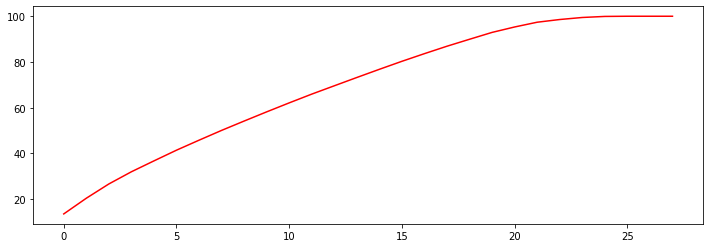

In [18]:
# Variance plot for PCA components obtained
plt.figure(figsize=(12,4))
plt.plot(var1,color="red");

### Selecting first 24 PCAs out of total 28

In [19]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:24],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7',
                                                             'pc8','pc9','pc10','pc11','pc12','pc13','pc14',
                                                             'pc15','pc16','pc17','pc18','pc19','pc20','pc21',
                                                             'pc22','pc23','pc24']),
                     df[['size_category']]], axis = 1)
finalDf.size_category.replace(('large','small'),(1,0),inplace=True)
finalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,size_category
0,3.766709,-1.320255,-0.843971,-1.994738,-1.453359,0.693985,0.308104,-0.019764,0.010161,-0.437314,...,-0.197543,-0.021839,0.688958,0.563603,-0.439596,-0.926619,-0.405425,-0.118719,-0.017933,0
1,0.390786,0.831062,-1.101365,1.400671,2.869388,0.965898,-2.795574,0.041095,-0.548879,0.104500,...,-2.503167,0.499649,0.563706,-0.703319,-1.535718,-0.892995,0.836590,0.204975,0.290771,0
2,0.690416,1.177746,-1.221998,2.442038,1.090630,0.390801,-1.586675,-2.159336,-0.090580,0.260888,...,-2.545144,-0.658411,-0.423618,0.860550,-1.195230,-0.297870,0.743648,0.081757,0.345915,0
3,3.359951,-1.161443,0.385728,-2.118328,-1.949601,1.027664,-0.179422,-0.250227,-0.620329,-1.343189,...,-0.040887,0.017843,0.332572,1.164745,-1.632741,-0.817618,1.523710,-0.342302,-0.378420,0
4,2.974329,-0.842626,1.327788,0.038086,-1.124763,-0.574676,-0.777155,0.303635,0.861126,-2.024719,...,0.844431,1.014944,-0.618231,0.822853,-1.794109,-0.723371,2.020419,-0.545591,0.161735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.087560,0.153964,1.241810,1.536581,0.372425,-1.133422,-0.362287,0.766946,0.818745,-0.289632,...,0.300522,0.513876,0.539642,-0.052958,1.898628,-1.441786,-0.821192,-1.205707,-0.698666,1
513,0.794366,-0.083966,2.670485,0.284995,0.223323,-0.904232,-0.014849,0.107226,1.340049,-0.147246,...,0.342367,0.485571,0.580150,0.384984,0.086251,-0.970693,-1.353365,-1.254890,-1.212175,1
514,0.921634,-0.264543,2.719216,-0.019643,0.242195,-0.966939,-0.118080,0.123010,1.290364,-0.177553,...,0.332816,0.344047,0.122409,0.313948,0.211157,-0.777731,-1.736711,-1.154127,-1.230040,1
515,-1.620549,-0.978838,0.331987,1.256638,-0.408164,0.735698,0.815510,-1.398344,0.076379,-0.005814,...,-0.011739,-1.035533,-0.774382,-0.216315,0.515791,0.080575,-0.055548,-0.067502,-0.311027,0


# Splitting dataset

In [20]:
array = finalDf.values
X = array[:,0:24]
Y = array[:,24]

X.shape

(517, 24)

In [21]:
Y.shape

(517,)

In [22]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [23]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=24, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [24]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# Fit the model
history= model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 1s 13ms/step - loss: 0.6546 - accuracy: 0.6873 - val_loss: 0.6685 - val_accuracy: 0.6257
Epoch 2/150
35/35 [==============================] - 0s 3ms/step - loss: 0.6232 - accuracy: 0.7339 - val_loss: 0.6627 - val_accuracy: 0.6374
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: 0.6040 - accuracy: 0.7284 - val_loss: 0.6617 - val_accuracy: 0.6550
Epoch 4/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5703 - accuracy: 0.7718 - val_loss: 0.6646 - val_accuracy: 0.6667
Epoch 5/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5574 - accuracy: 0.7776 - val_loss: 0.6675 - val_accuracy: 0.6725
Epoch 6/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5393 - accuracy: 0.7555 - val_loss: 0.6732 - val_accuracy: 0.6784
Epoch 7/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5209 - accuracy: 0.7723 - val_loss: 0.6809 - val_accuracy: 0.6842
Epoch 8/150


Epoch 59/150
35/35 [==============================] - 0s 3ms/step - loss: 0.2288 - accuracy: 0.9049 - val_loss: 0.8229 - val_accuracy: 0.7251
Epoch 60/150
35/35 [==============================] - 0s 3ms/step - loss: 0.2243 - accuracy: 0.9038 - val_loss: 0.8315 - val_accuracy: 0.7368
Epoch 61/150
35/35 [==============================] - 0s 3ms/step - loss: 0.2519 - accuracy: 0.8795 - val_loss: 0.8362 - val_accuracy: 0.7368
Epoch 62/150
35/35 [==============================] - 0s 3ms/step - loss: 0.2118 - accuracy: 0.8992 - val_loss: 0.8395 - val_accuracy: 0.7485
Epoch 63/150
35/35 [==============================] - 0s 3ms/step - loss: 0.2026 - accuracy: 0.9135 - val_loss: 0.8504 - val_accuracy: 0.7427
Epoch 64/150
35/35 [==============================] - 0s 3ms/step - loss: 0.2040 - accuracy: 0.9074 - val_loss: 0.8578 - val_accuracy: 0.7485
Epoch 65/150
35/35 [==============================] - 0s 3ms/step - loss: 0.1979 - accuracy: 0.9109 - val_loss: 0.8586 - val_accuracy: 0.7485
Epoch 

35/35 [==============================] - 0s 3ms/step - loss: 0.0628 - accuracy: 0.9887 - val_loss: 1.0856 - val_accuracy: 0.7836
Epoch 117/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0614 - accuracy: 0.9858 - val_loss: 1.0996 - val_accuracy: 0.7895
Epoch 118/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0682 - accuracy: 0.9754 - val_loss: 1.1064 - val_accuracy: 0.7895
Epoch 119/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0952 - accuracy: 0.9669 - val_loss: 1.1077 - val_accuracy: 0.7836
Epoch 120/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0827 - accuracy: 0.9875 - val_loss: 1.1082 - val_accuracy: 0.7836
Epoch 121/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9843 - val_loss: 1.1080 - val_accuracy: 0.7895
Epoch 122/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0584 - accuracy: 0.9894 - val_loss: 1.1222 - val_accuracy: 0.7836
Epoch 123/150

In [26]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

17/17 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.9265
accuracy: 92.65%


In [27]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

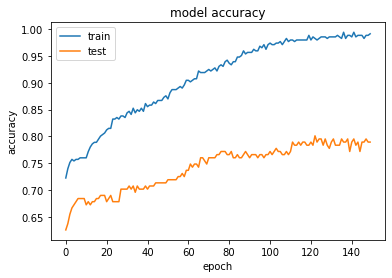

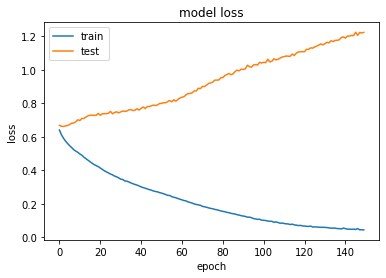

In [28]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Hyperparameter Tuning

In [29]:
x = array[:,0:24] 
y = array[:,24]

print(x.shape,y.shape)

(517, 24) (517,)


#### Tuning of Hyperparameters :- Batch Size and Epochs

In [30]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam 

In [31]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=24, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [32]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size, epochs = epochs)


# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.952 total time=   1.4s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.856 total time=   1.4s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.738 total time=   1.3s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.816 total time=   1.4s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.825 total time=   1.3s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

[CV 2/5; 8/9] END .....batch_size=40, epochs=50;, score=0.846 total time=   1.3s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................
[CV 3/5; 8/9] END .....batch_size=40, epochs=50;, score=0.767 total time=   1.1s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................
[CV 4/5; 8/9] END .....batch_size=40, epochs=50;, score=0.874 total time=   1.2s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................
[CV 5/5; 8/9] END .....batch_size=40, epochs=50;, score=0.903 total time=   1.2s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................
[CV 1/5; 9/9] END ....batch_size=40, epochs=100;, score=0.990 total time=   1.9s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................
[CV 2/5; 9/9] END ....batch_size=40, epochs=100;, score=0.856 total time=   1.9s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................
[CV 3/5; 9/9] END ....batch_